In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

%matplotlib inline

Consider the equation: 
$$y = 2x^2 + 5x + 2 $$

We define the function and its derivative below.

In [2]:
def tangent_line(m, x0, y0, length = 1):
#  Helper function for drawning tangent linesdef tangent_line(m, x0, y0, length = 1):
    x = np.linspace(x0 - length / 2, x0 + length / 2)
    y = m * (x - x0) + y0
    return x, y

#  Our function of interest, a quadratic equation
def quadratic(x, args = None):
    return 2 * np.power(x, 2) + 5*x + 2

#  Our function's derivative
def quadratic_derivative(x, args = []):
    return 4 * x + 5

NameError: name 'derivative' is not defined

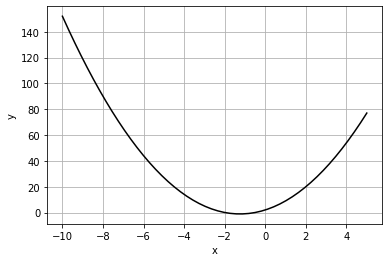

In [3]:
#  Plot the quadratic
x = np.linspace(-10, 5)
plt.plot(x, quadratic(x), 'k')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
#plt.xlim( [-5.5, 6] )

#  Plot the tangent line at our initial guess
x0 = 4
slope = derivative(x0)
print('Slope at x = ', x0, ' is ', slope)
X, Y = tangent_line(slope, x0, quadratic(x0), length = 3)

plt.plot(X, Y, 'b--')

###  Update Rule
To reiterate, we are walking downhill (the direction of the negative of the derivative (or gradient in multidimensional case).  The equation for updating our guess of the minimum is given by,
$$a_{n+1} = a_n - \gamma \nabla F(a_n)$$

The constant $\gamma$ Is a scaling fctor which allows some control over the size of the step taken.


In [4]:
#  Our gradient descent implementation.  For the time being, there is no cutoff criteria other than reaching max count
#  fprime is the function which returns the derivative or gradient
# x0 is out initial guess for the minimum
def gradient_descent(fprime, x0, args = None, gamma = 1e-3, max_iter = 1e5, debug = False, f = None):
    count = 0
    
    if f:
        J = np.zeros( (int(max_iter) + 2, ) )
        J[count] = f(x0, args)
        
        if isinstance(x0, float) or isinstance(x0, int):
            X = np.zeros( (int(max_iter) + 2, ) )
        else:
            if x0.ndim == 1 and x0.size > 1:
                X = np.zeros( (int(max_iter) + 2, x0.size) )
        
        X[count] = x0
        
    while count <= max_iter:
        count = count + 1
        x0 = x0 - gamma * fprime(x0, args)
        if debug == True:
            X[count] = x0
            J[count] = f(x0, args)
    
    if debug == True:
        return x0, count, X, J
    else:
        return x0, count
    

In [5]:
#  Call the function and print the results.  Actual min is at -1.25
x0, count = gradient_descent(quadratic_derivative, 4)
print(x0)

-1.2499999999999725


##  The Effects of $\gamma$

Too large a value of $\gamma$ can cause us to overshoot the minimum while too small a value will stop us from making progress.

A potential way to see what is happening is to plot the function value at each iteration of the loop.  We should be moving down with each step until the code converges.

-1.2499999999999725


(0.0, 10000.0)

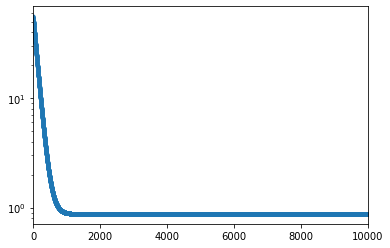

In [13]:
x0, count, X, J = gradient_descent(quadratic_derivative, 4, gamma = 1e-3, debug = True, f = quadratic)
print(x0)

#  Lets plot the function value at each iteration.  We should be constanly decreaseing.
#  I added 2 to the function bvalue because I wanted to plot it on a log scale.
#  The actual minimum is around -1.25 which would cause a problem on a plot of this type.
plt.semilogy(J+2, '.')
plt.xlim([0, 10000] )

##  Local vs. Global minima

  Consider the equation,
  
  $$y = \frac{1}{2}x^4 - 10 x^3 +50 x^2 + 12 x - 54$$

-0.11593645488434078
9.875379637224436


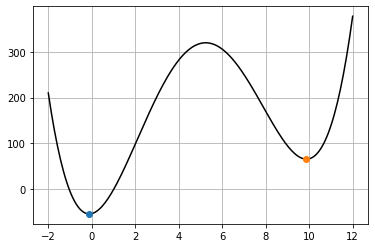

In [14]:
x = np.linspace(-2, 12, 200)
y = 0.5 *  np.power(x, 4) - 10  * np.power(x, 3) + 50 * np.power(x, 2) + 12 * x - 54

plt.plot(x, y, 'k')
plt.grid(True)

def quartic(x, args = None):
    return  0.5 *  np.power(x, 4) - 10  * np.power(x, 3) + 50 * np.power(x, 2) + 12 * x - 54

def quartic_derivative(x, args = None):
    return 2 * np.power(x, 3) - 30 * np.power(x, 2) + 100 * x + 12

x0, count = gradient_descent(quartic_derivative, -2)
print(x0)
plt.plot(x0, quartic(x0), 'o')

x0, count = gradient_descent(quartic_derivative, 6)
print(x0)
plt.plot(x0, quartic(x0), 'o')

## Numerical Estimation of the Derivative or Gradient

In [15]:
#  Estimate the derivative of f with a central difference equation
def derivative_approx(f, x, delta = 1e-7, args = None):
    return (  (f(x + delta) - f(x - delta)) / (2 * delta) )

#  I chose to use a lambda here though I could have just written it as a ormal function.
my_deriv = lambda x, args : derivative_approx(quadratic, x)

Let's try our approximation for the derivative in our gradient descent function.

In [16]:
x0, count = gradient_descent(my_deriv, 4)
print(x0)

-1.250000000039945


Numpy/Scipy comes with routines to do function optimization.  Let's check our results with the minimize function from scipy.optimize.

In [231]:
minimize(quadratic, -4)

      fun: -1.1249999999999987
 hess_inv: array([[0.25]])
      jac: array([1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([-1.24999997])

##  Multi-Variable Csses

If we have more than one variable, we need the gradient which is defined as (for two variables),

$$\nabla F(u, v) = \frac{ \partial F}{\partial u} \hat{u} + \frac{ \partial F}{\partial v} \hat{v}$$

So now, we need to code a function that returns the partial derivatives of our function as a vector.

###  Linear Regression


[1.90121727 0.31438759]
Slope =  1.9012172673220806
Intercept =  0.3143875934705495


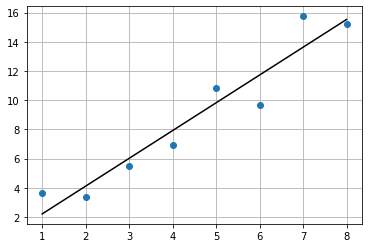

In [18]:
np.random.seed(1)

x = np.array([1,2,3,4,5,6,7,8])
y = 2 * x + np.random.normal(0, 1, size = x.size)

plt.plot(x, y, 'o')
plt.grid(True)

#  I am using the polyfit function to do the regression.  In the past, we've used 
#  A function from scipy.stats
p = np.polyfit(x, y, 1); print(p)
plt.plot(x, p[0] * x + p[1], 'k')
print('Slope = ', p[0])
print('Intercept = ', p[1])

We want to find a line of the form,
$$y = mx * b$$
where $m$ is the slope and $b$ is the y-intercept, such that we minimize the squared error between our line and the data  points.
$$J(m, b) = \sum_i [y_i - (mx_i + b)]^2$$

We want values of $m$ and $b$ such that we minimize $J$

###  Gradient Calculation
$$\frac{\partial J}{\partial m} =  \sum_i -2x_i (y_i - mx_i - b)$$
$$\frac{\partial J}{\partial b} =  \sum_i -2 (y_i - mx_i - b)$$

In [21]:
def linear_regression_cost_function(x0, x, y):
    m = x0[0]
    b = x0[1]
    
    return np.sum( np.square( (y - (m*x + b)) ) )

def linear_regression_gradient(x0, args):
    x = args[0]
    y = args[1]
    
    m = x0[0]
    b = x0[1]

    Fp1 = np.sum(2 * (y - m*x -b) * (-x))
    Fp2 = np.sum(2 * (y - m * x - b) * ( -1))
    
    return np.array( [Fp1, Fp2] )

In [22]:
args = (x, y)
x0 = np.array( [-5, 2] )

x0, count = gradient_descent(linear_regression_gradient, x0, args = args)

In [24]:
#  Print out our slope and intercept.
print(x0)

[1.90121727 0.31438759]


##  Simple Logistic Regression

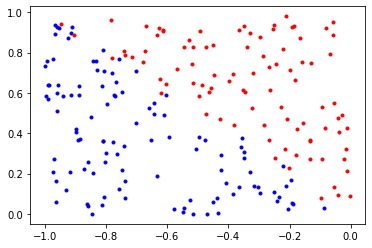

In [25]:
np.random.seed(5)

set1 = np.random.rand(200,2 ).T
set2 = np.random.rand(200,2 ).T

theta = np.radians(45)
R = np.array( [ [np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)] ] )

set1 = np.matmul(R, set1)
ind = np.where(set1[0,:] >= 0.02)
set1 = np.delete(set1, ind, 1)

set2 = np.matmul(R, set2)
ind = np.where(set2[0,:] <= -0.02)
set2 = np.delete(set2, ind, 1)

theta = np.radians(-45)
set1 = np.matmul(R, set1)
set2 = np.matmul(R, set2)

set1 = set1.T
set2 = set2.T

plt.plot(set1[:,0], set1[:,1], 'b.')
plt.plot(set2[:,0], set2[:,1], 'r.')

set1_labels = np.zeros( (set1.shape[0], 1) )
set2_labels = np.ones( (set2.shape[0], 1) )

X = np.vstack( (set1, set2) )
Y = np.vstack( (set1_labels, set2_labels) )

m, n = X.shape

X = np.hstack( (np.ones( (m, 1) ), X) )

###  Sigmoid function
$$g(z) = \frac{1}{1 + e^{-z}}$$

In [29]:
def sigmoid(x):
    return( 1 / (1 + np.exp(-x)))

##  Vectorization, Cost Function, and Gradient
Let theta be our parameter vector.  We will define it as a column vector,
$$\theta = \left(
\begin{array}{c}
\theta_0 \\
\theta_1 \\
\theta_2
\end{array}
\right)$$

$$h_\theta = g(\theta^\dagger x)$$
The function we are trying to minimize,

$$J(\theta) = \frac{1}{m} \sum_i \left[-y_i \log(h_\theta(x_i)) - (1-y_i) 
\log(1 - h_\theta(x_i))\right]
$$

The gradient is given by, 
$$
\frac{\partial J}{\partial \theta_j} = \frac{1}{m} \sum_i
(h_\theta(x_i) - y_i) x_{(j)}
$$

In [30]:
def logistic_cost(theta, args):
    
    X = args[0]
    Y = args[1]
    
    m = Y.size
          
    term1 = np.multiply( -Y.T, np.log( sigmoid( np.matmul(theta.T, X.T) ) ) )
    term2 = np.multiply( (1-Y).T, np.log( 1 - sigmoid( np.matmul(theta.T, X.T)) ) )
          
    ans = 1 / m * np.sum(term1 - term2)
        
    return ans
    

def logistic_gradient(theta, args):
    
    X = args[0]
    Y = args[1]
    
    m = Y.size

    theta = theta[:, np.newaxis]
    
    temp = sigmoid( np.matmul(theta.T, X.T) ).T - Y
    temp = np.multiply(temp, X)
    temp = 1 / m * np.sum(temp, axis = 0)
    
    return temp

In [31]:
args = [X, Y]
x0 = np.zeros( (3, ))

#  The commented-out line below is what I used in the video
#x0, count, theta, J = gradient_descent(gradient, x0, args = args, f = cost, debug=True, max_iter = 5e7, gamma = 1e-3)

#  This doesn't quite converge, but it still looks relatively good when I plot the decision boundary
x0, count, theta, J = gradient_descent(logistic_gradient, x0, args = args, f = logistic_cost, debug=True, max_iter =1e6, gamma = 5e-3)
print(x0)

[ 0.26070192 21.51200312 20.72742558]


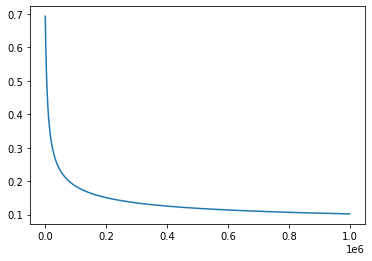

In [32]:
#J = J[1::2]

#  If the function drops by orders of magnitude, it cab be helpful to use a log scale on the y-axis
#plt.semilogy(J)

#  Here, I use a linear scale
plt.plot(J)

Let's plot the decision boundary.

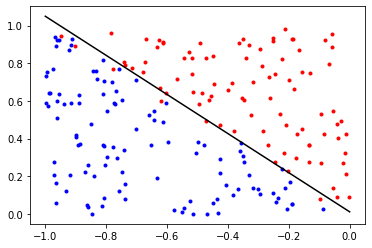

In [33]:
plt.plot(set1[:,0], set1[:,1], 'b.')
plt.plot(set2[:,0], set2[:,1], 'r.')

x = np.linspace(-1, 0)
y = (0.5 - x0[0] - x0[1] * x) / x0[2]

plt.plot(x, y, 'k')